In [366]:
#öncelikle kullanabileceğimiz kütüphaneleri yüklemekle başlayalım
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [367]:
#daha sonra verimizi yükleyelim
data = pd.read_csv("dataset/flights_weather2022.csv")

In [368]:
#okuması kolay olması açısından sütun başlıklarını türkçe olarak değiştiriyorum.
data.columns = ['yıl', 'ay', 'gün', 'kalkış_zamanı', 'planlanan_kalkış_zamanı', 'kalkış_gecikmesi',
                'varış_zamanı', 'planlanan_varış_zamanı', 'varış_gecikmesi', 'havayolu', 'uçuş_numarası',
                'kuyruk_numarası', 'kalkış_noktası', 'varış_noktası', 'hava_süresi', 'mesafe', 'saat',
                'dakika', 'havayolu_şirketi', 'uçuş_rotası', 'sıcaklık', 'çiğ_noktası', 'nem', 
                'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_şiddeti', 'yağış', 'basınç', 'görüş_mesafesi']

In [369]:
#bütün sütunları görebilmek için alttaki sorguyu yazdım.
pd.set_option('display.max_columns', None)

In [370]:
#tablomuzu inceleme adına rastgele 5 satırı çekiyorum
data.sample(5)

,yıl,ay,gün,kalkış_zamanı,planlanan_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,planlanan_varış_zamanı,varış_gecikmesi,havayolu,uçuş_numarası,kuyruk_numarası,kalkış_noktası,varış_noktası,hava_süresi,mesafe,saat,dakika,havayolu_şirketi,uçuş_rotası,sıcaklık,çiğ_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş_mesafesi
74580,2022,5,7,1140.0,1015,85.0,1340.0,1231,69.0,DL,698,N3742C,SEA,SFO,104.0,679,10,15,Delta Air Lines Inc.,SEA-SFO,46.0,44.0,93.03,350.0,5.75390,6.621473,0.07,1006.5,5.0
57141,2022,4,9,2052.0,2059,-7.0,2343.0,2333,10.0,AS,261,N556AS,SEA,BZN,71.0,543,20,59,Alaska Airlines Inc.,SEA-BZN,43.0,35.0,73.45,0.0,0.00000,0.000000,0.02,1025.7,10.0
76238,2022,5,9,NaN,955,NaN,NaN,1604,NaN,AS,354,N528AS,SEA,AUS,NaN,1770,9,55,Alaska Airlines Inc.,SEA-AUS,43.0,40.0,88.71,150.0,6.90468,7.945768,0.00,1010.7,10.0
67434,2022,4,26,612.0,615,-3.0,750.0,755,-5.0,WN,301,N961WN,PDX,OAK,84.0,543,6,15,Southwest Airlines Co.,PDX-OAK,49.0,43.0,79.98,350.0,4.60312,5.297178,0.00,1018.6,10.0
91183,2022,6,2,608.0,615,-7.0,1105.0,1130,-25.0,DL,339,N546US,SEA,MSP,161.0,1399,6,15,Delta Air Lines Inc.,SEA-MSP,59.0,53.0,80.75,20.0,6.90468,7.945768,0.00,1015.4,10.0


In [371]:
#veri tiplerini incelemek için
#ortak veri tipleri yapmamız lazım. aşağıda sorgularda yapmaya başlayabiliriz.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111005 entries, 0 to 111004
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   yıl                      111005 non-null  int64  
 1   ay                       111005 non-null  int64  
 2   gün                      111005 non-null  int64  
 3   kalkış_zamanı            108565 non-null  float64
 4   planlanan_kalkış_zamanı  111005 non-null  int64  
 5   kalkış_gecikmesi         108565 non-null  float64
 6   varış_zamanı             108468 non-null  float64
 7   planlanan_varış_zamanı   111005 non-null  int64  
 8   varış_gecikmesi          108331 non-null  float64
 9   havayolu                 111005 non-null  object 
 10  uçuş_numarası            111005 non-null  int64  
 11  kuyruk_numarası          110876 non-null  object 
 12  kalkış_noktası           111005 non-null  object 
 13  varış_noktası            111005 non-null  object 
 14  hava

In [372]:
#null değerleri belirleme
data.isnull().sum()

yıl                           0
ay                            0
gün                           0
kalkış_zamanı              2440
planlanan_kalkış_zamanı       0
kalkış_gecikmesi           2440
varış_zamanı               2537
planlanan_varış_zamanı        0
varış_gecikmesi            2674
havayolu                      0
uçuş_numarası                 0
kuyruk_numarası             129
kalkış_noktası                0
varış_noktası                 0
hava_süresi                2674
mesafe                        0
saat                          0
dakika                        0
havayolu_şirketi              0
uçuş_rotası                   0
sıcaklık                      0
çiğ_noktası                   0
nem                           0
rüzgar_yönü                3163
rüzgar_hızı                 279
rüzgar_şiddeti              279
yağış                         0
basınç                        0
görüş_mesafesi                0
dtype: int64

In [374]:
data[data['kalkış_zamanı'].isnull()]
#kalkış zamanı null olan uçakların hepsi planda olmayan sebeplerden dolayı iptal edilmiş gibi gözüküyor.
#iptal sebeplerini şuan için ön geremiyoruz.
#ancak yeni bir uçuş_durumu sütunu açarak kalkış_zamanı null olan verilerde uçuş_durumu iptal 
#eğer uçuş gerçekleşti ise gerçekleşti yazacak.

,yıl,ay,gün,kalkış_zamanı,planlanan_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,planlanan_varış_zamanı,varış_gecikmesi,havayolu,uçuş_numarası,kuyruk_numarası,kalkış_noktası,varış_noktası,hava_süresi,mesafe,saat,dakika,havayolu_şirketi,uçuş_rotası,sıcaklık,çiğ_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş_mesafesi
485,2022,1,1,NaN,1845,NaN,NaN,2104,NaN,OO,916,N182SY,PDX,PSP,NaN,873,18,45,SkyWest Airlines Inc.,PDX-PSP,28.0,16.0,60.25,110.0,8.05546,9.270062,0.0,1027.8,10.0
486,2022,1,1,NaN,945,NaN,NaN,1135,NaN,OO,949,N178SY,PDX,SJC,NaN,569,9,45,SkyWest Airlines Inc.,PDX-SJC,26.1,14.0,59.71,120.0,8.05546,9.270062,0.0,1025.1,10.0
487,2022,1,1,NaN,1327,NaN,NaN,1905,NaN,OO,966,N277SY,SEA,MCI,NaN,1489,13,27,SkyWest Airlines Inc.,SEA-MCI,24.1,17.1,74.27,130.0,8.05546,9.270062,0.0,1025.1,10.0
488,2022,1,1,NaN,1715,NaN,NaN,1925,NaN,OO,971,N253SY,PDX,LAX,NaN,834,17,15,SkyWest Airlines Inc.,PDX-LAX,27.0,15.1,60.37,110.0,9.20624,10.594357,0.0,1027.7,10.0
489,2022,1,1,NaN,1515,NaN,NaN,1620,NaN,OO,1026,N272SY,SEA,RDM,NaN,228,15,15,SkyWest Airlines Inc.,SEA-RDM,26.1,17.1,68.34,140.0,9.20624,10.594357,0.0,1025.6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111000,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,206,NaN,SEA,EWR,NaN,2402,11,55,United Air Lines Inc.,SEA-EWR,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0
111001,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,323,N3759,SEA,LAX,NaN,954,14,48,Delta Air Lines Inc.,SEA-LAX,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0
111002,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,377,N898DN,SEA,ORD,NaN,1721,17,51,Delta Air Lines Inc.,SEA-ORD,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0
111003,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,114,N876DN,SEA,JFK,NaN,2422,11,45,Delta Air Lines Inc.,SEA-JFK,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0


In [375]:
# Yeni bir uçuş_durumu sütunu oluşturmak ve null olan değerlere "iptal" ataması yapacağız.
# İptal edilen uçuşlar
iptal_edilen = data[data['kalkış_zamanı'].isnull()].index

# Tamamlanan uçuşlar
tamamlanan = data[data['kalkış_zamanı'].notnull()].index

# İptal edilen uçuşların uçuş durumunu 'iptal edildi' olarak güncelle
data.loc[iptal_edilen, 'uçuş_durumu'] = 'iptal_edildi'

# Tamamlanan uçuşların uçuş durumunu 'tamamlandı' olarak güncelle
data.loc[tamamlanan, 'uçuş_durumu'] = 'gerçekleşti'


In [376]:
data[data['uçuş_durumu'] == 'gerçekleşti'].isnull().sum()
#çoğu null değerimin ortadan kalktığını görüyorum.
#bu güzel birşey :)

yıl                           0
ay                            0
gün                           0
kalkış_zamanı                 0
planlanan_kalkış_zamanı       0
kalkış_gecikmesi              0
varış_zamanı                 97
planlanan_varış_zamanı        0
varış_gecikmesi             234
havayolu                      0
uçuş_numarası                 0
kuyruk_numarası               0
kalkış_noktası                0
varış_noktası                 0
hava_süresi                 234
mesafe                        0
saat                          0
dakika                        0
havayolu_şirketi              0
uçuş_rotası                   0
sıcaklık                      0
çiğ_noktası                   0
nem                           0
rüzgar_yönü                3116
rüzgar_hızı                 274
rüzgar_şiddeti              274
yağış                         0
basınç                        0
görüş_mesafesi                0
uçuş_durumu                   0
dtype: int64

In [377]:
#Bu kod, her bir satır için null olan rüzgar_yönü değerlerini dolduracaktır. 
#aynı gün, saat ve kalkış noktasına sahip diğer null olamyan satırların rüzgar_yönü değerlerini kontrol eder. 
#Eğer bu diğer satırlardan herhangi birinin rüzgar_yönü değeri null değilse, 
#bu değeri null olan satırdaki rüzgar_yönü değerine atar.

# Null olan rüzgar yönlerini doldurma işlemi
for index, row in data.iterrows():
    if pd.isnull(row['rüzgar_yönü']):
        same_time_flights = data[(data['gün'] == row['gün']) & (data['saat'] == row['saat']) & (data['kalkış_noktası'] == row['kalkış_noktası'])]
        non_null_wind_directions = same_time_flights.dropna(subset=['rüzgar_yönü'])
        if not non_null_wind_directions.empty:
            data.at[index, 'rüzgar_yönü'] = non_null_wind_directions['rüzgar_yönü'].mean()

In [379]:
data[data['uçuş_durumu'] == 'gerçekleşti'].isnull().sum()

yıl                          0
ay                           0
gün                          0
kalkış_zamanı                0
planlanan_kalkış_zamanı      0
kalkış_gecikmesi             0
varış_zamanı                97
planlanan_varış_zamanı       0
varış_gecikmesi            234
havayolu                     0
uçuş_numarası                0
kuyruk_numarası              0
kalkış_noktası               0
varış_noktası                0
hava_süresi                234
mesafe                       0
saat                         0
dakika                       0
havayolu_şirketi             0
uçuş_rotası                  0
sıcaklık                     0
çiğ_noktası                  0
nem                          0
rüzgar_yönü                  0
rüzgar_hızı                274
rüzgar_şiddeti             274
yağış                        0
basınç                       0
görüş_mesafesi               0
uçuş_durumu                  0
dtype: int64

In [321]:
#bu sorgumda null değerleri ortadan kaldırırken sütunları değerlendirmek adına atıyorum.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yıl,111005.0,2022.000000,0.000000,2022.00,2022.000000,2022.000000,2022.000000,2022.000000
ay,111005.0,3.623287,1.713277,1.00,2.000000,4.000000,5.000000,6.000000
gün,111005.0,15.736778,8.723429,1.00,8.000000,16.000000,23.000000,31.000000
kalkış_zamanı,108565.0,1336.453968,540.665268,1.00,912.000000,1309.000000,1800.000000,2400.000000
planlanan_kalkış_zamanı,111005.0,1342.073042,530.610456,2.00,910.000000,1305.000000,1800.000000,2359.000000
kalkış_gecikmesi,108565.0,8.038069,41.687735,-36.00,-5.000000,-2.000000,6.000000,2120.000000
varış_zamanı,108468.0,1467.245160,570.940430,1.00,1055.000000,1520.000000,1917.000000,2400.000000
planlanan_varış_zamanı,111005.0,1506.332670,546.798650,3.00,1115.000000,1540.000000,1937.000000,2359.000000
varış_gecikmesi,108331.0,2.359159,43.088765,-65.00,-14.000000,-5.000000,6.000000,2098.000000
uçuş_numarası,111005.0,433.667619,267.777907,1.00,210.000000,416.000000,644.000000,1100.000000


In [380]:
#verimdeki kalan null değerleri yüzdelik olarak çok az oldukları için siliyorum.
data.dropna(subset=['varış_zamanı', 'varış_gecikmesi', 'rüzgar_hızı'], inplace=True)

In [381]:
# Kalkış gecikmesi sütunundaki negatif değerleri kontrol etmek için
negatif_gecikme = data[data['kalkış_gecikmesi'] < 0]

# Negatif kalkış gecikmelerinin sayısını veya boyutunu göstermek için
print("Negatif kalkış gecikmeleri sayısı:", len(negatif_gecikme))
#buradan veride belirtilen uçuşların yarısı belirlenen saatten daha erken kalktığını görüyoruz.
#yukarıdaki describe dan da ortalama değerin 8 dakika gecikme olduğu ancak bu gecikmenin max değerlerin çok yüksek olmasından
#dolayı olduğunu görüyoruz.

Negatif kalkış gecikmeleri sayısı: 62736


In [382]:
#tekrardan veri tiplerine bakıyoruz
data.info()
#veri tiplerine müdehale ediyorum.

<class 'pandas.core.frame.DataFrame'>
Index: 108058 entries, 0 to 110999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   yıl                      108058 non-null  int64  
 1   ay                       108058 non-null  int64  
 2   gün                      108058 non-null  int64  
 3   kalkış_zamanı            108058 non-null  float64
 4   planlanan_kalkış_zamanı  108058 non-null  int64  
 5   kalkış_gecikmesi         108058 non-null  float64
 6   varış_zamanı             108058 non-null  float64
 7   planlanan_varış_zamanı   108058 non-null  int64  
 8   varış_gecikmesi          108058 non-null  float64
 9   havayolu                 108058 non-null  object 
 10  uçuş_numarası            108058 non-null  int64  
 11  kuyruk_numarası          108058 non-null  object 
 12  kalkış_noktası           108058 non-null  object 
 13  varış_noktası            108058 non-null  object 
 14  hava_süre

In [383]:
#zaman kavramları olan verileri hepsini işlem yapabilmek adına integer veri tipine çeviriyorum.
data['kalkış_zamanı'] = data['kalkış_zamanı'].astype('int64')
data['kalkış_gecikmesi'] = data['kalkış_gecikmesi'].astype('int64')
data['varış_zamanı'] = data['varış_zamanı'].astype('int64')
data['varış_gecikmesi'] = data['varış_gecikmesi'].astype('int64')
data['hava_süresi'] = data['hava_süresi'].astype('int64')

In [384]:
data.info()
#en son tekrar kontrol ederek veri tiplerimi de ortak paydada buluşturuyorum.

<class 'pandas.core.frame.DataFrame'>
Index: 108058 entries, 0 to 110999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   yıl                      108058 non-null  int64  
 1   ay                       108058 non-null  int64  
 2   gün                      108058 non-null  int64  
 3   kalkış_zamanı            108058 non-null  int64  
 4   planlanan_kalkış_zamanı  108058 non-null  int64  
 5   kalkış_gecikmesi         108058 non-null  int64  
 6   varış_zamanı             108058 non-null  int64  
 7   planlanan_varış_zamanı   108058 non-null  int64  
 8   varış_gecikmesi          108058 non-null  int64  
 9   havayolu                 108058 non-null  object 
 10  uçuş_numarası            108058 non-null  int64  
 11  kuyruk_numarası          108058 non-null  object 
 12  kalkış_noktası           108058 non-null  object 
 13  varış_noktası            108058 non-null  object 
 14  hava_süre

In [385]:
#kopyalanan veri var mı diye kontrol ediyorum.
#duplicated()Bu fonksiyon, veri setinde tekrarlanan satırları tespit eder
df = pd.DataFrame(data)

# Kopyaları kontrol et
kopyalar = df[df.duplicated()]

if kopyalar.empty:
    print("Veri setinde kopya satırlar bulunmamaktadır.")
else:
    print("Veri setinde kopya satırlar bulunmaktadır.")

print(kopyalar)

Veri setinde kopya satırlar bulunmamaktadır.
Empty DataFrame
Columns: [yıl, ay, gün, kalkış_zamanı, planlanan_kalkış_zamanı, kalkış_gecikmesi, varış_zamanı, planlanan_varış_zamanı, varış_gecikmesi, havayolu, uçuş_numarası, kuyruk_numarası, kalkış_noktası, varış_noktası, hava_süresi, mesafe, saat, dakika, havayolu_şirketi, uçuş_rotası, sıcaklık, çiğ_noktası, nem, rüzgar_yönü, rüzgar_hızı, rüzgar_şiddeti, yağış, basınç, görüş_mesafesi, uçuş_durumu]
Index: []


In [21]:
#kopyalanan bir veri olmadığı için devam ediyoruz.

In [23]:
#VERİ TEMİZLİĞİ YAPTIKTAN SONRA VERİYİ YORUMLAMAYA BAŞLIYORUZ.

In [ ]:
#uçuş durumu statüsü(iptal veya gerçekleşti) yüzdelik olarak düşük bir oran olduğu için her sorgumda uçuş durumu statüsünü dahil etmeyeceğim.

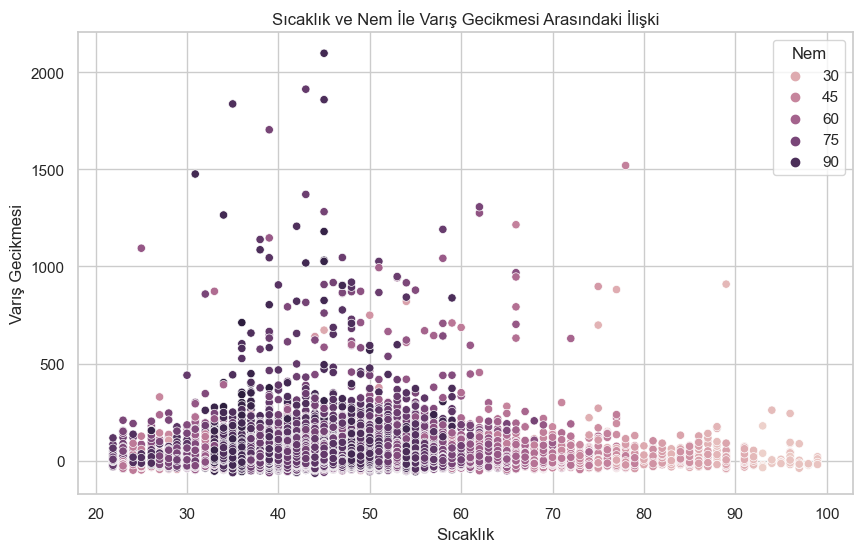

In [330]:
#uçuş gecikmeleri ve hava durumu paremetreleri arasındaki bağlantılara bakalım.
#gecikme sütunu olarak varış gecikmesini baz alıyorum. kalkış gecikmesinden daha önemli olduğu için.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sıcaklık', y='varış_gecikmesi', hue='nem')
plt.title('Sıcaklık ve Nem İle Varış Gecikmesi Arasındaki İlişki')
plt.xlabel('Sıcaklık')
plt.ylabel('Varış Gecikmesi')
plt.legend(title='Nem')
plt.show()

In [69]:
#sıcaklık ortalama değerlerin üstüne çıktığında(35 ve üstü) aynı zamanda havanın nemi de arttığında gecikmelerin arttığı gözleniyor
#daha da detaylı bakabilmek adına altta korelasyon matrisini çıkartıyorum.

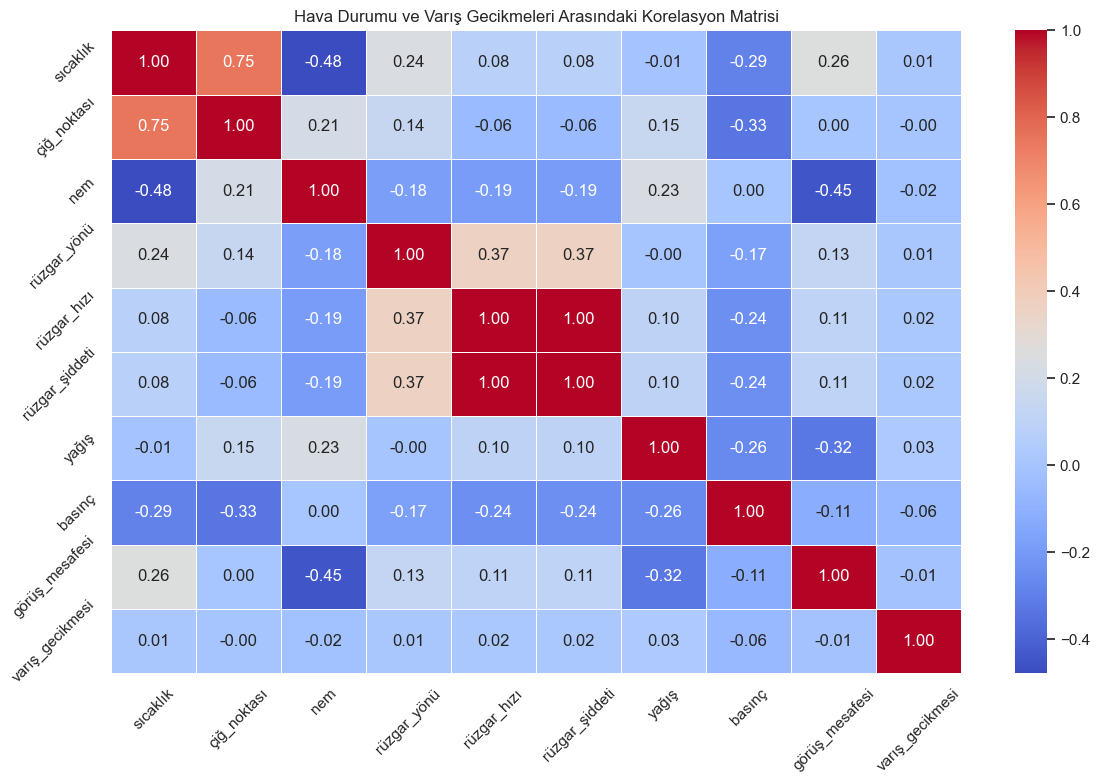

In [331]:
# Hava durumu bilgileri ve varış gecikmeleri arasındaki korelasyon matrisini oluşturmak için ilgili sütunları seçelim
weather_columns = ['sıcaklık', 'çiğ_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_şiddeti', 'yağış', 'basınç', 'görüş_mesafesi', 'varış_gecikmesi']
weather_data = data[weather_columns]

# Korelasyon matrisini hesaplayalım
correlation_matrix = weather_data.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Hava Durumu ve Varış Gecikmeleri Arasındaki Korelasyon Matrisi')
plt.xticks(rotation=45)  # x eksenindeki etiketlerin açısını ayarlayalım
plt.yticks(rotation=45)  # y eksenindeki etiketlerin açısını ayarlayalım
plt.tight_layout()  # grafikteki etiketlerin daha iyi otomatik yerleştirilmesini sağlayalım
plt.show()

In [ ]:
#matrix de yağış sebebiyle varış gecikmelerinin yaşandığı gözlenmektedir.rüzgar şiddeti ve hızı da gecikmeye sebep olmaktadır.
#basınç arttıkça gecikme ortadan kalkarak varışın planlanan varıştan önce gerçekleştiği gözlenmektedir.

In [332]:
#Gecikmeler açısından hangi havayolları en kötü performansı gösteriyor? buna bir bakalım

# Havayolu şirketlerinin ortalama gecikme sürelerini hesaplıyoruz.
average_delay_by_airline = data.groupby('havayolu')['varış_gecikmesi'].mean().reset_index()
#havayolu sütununa göre grupluyoruz ve her havayolu şirketi için ortalama gecikmeyi alıyoruz.

# Ortalama gecikme sürelerine göre havayolu şirketlerini sıralıyoruz.
sorted_airlines_by_delay = average_delay_by_airline.sort_values(by='varış_gecikmesi', ascending=False)

print(sorted_airlines_by_delay)

   havayolu  varış_gecikmesi
2        B6        31.516588
5        G4        22.219780
4        F9        10.922727
0        AA         9.066368
7        NK         5.389706
6        HA         4.579972
9        QX         4.190412
11       WN         2.949155
1        AS         2.636312
3        DL         0.904744
8        OO        -0.564454
10       UA        -4.515711


In [72]:
#en iyi ve en kötü hava yolu şirketi seçimi yaparken gecikme paremetresini kullanacağız. 
#çünkü veri setimizde fiyat/performans puanı yada ikramlar yada konfor gibi değerlendirebileceğiz standartlar yoktur.
#bu sebeple en iyi havayolu şirketi -4 dakika gecikmeyle UA
#en kötü havayolu şirketi ise B6 firması kabul ediyoruz.

In [ ]:
#Uçuş performansı yılın aylarına göre değişiyor mu? 
#Bir havayolu şirketi her zaman en kötü performansı gösteren havayolu mudur, yoksa değişkenlik var mıdır?

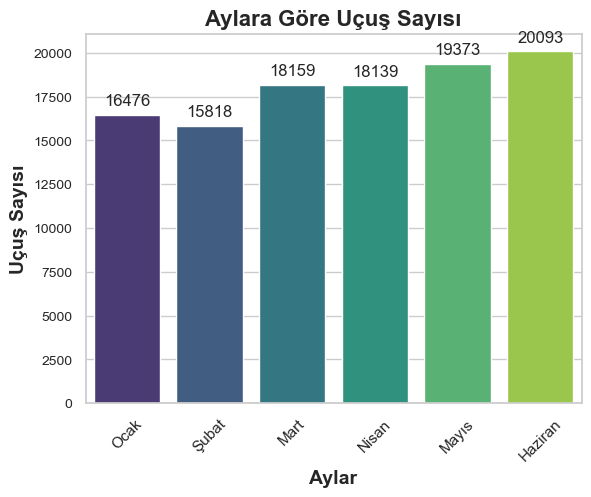

In [333]:
# Ay isimlerini içeren bir sözlük oluşturun
ay_haritasi = {
    1: "Ocak",
    2: "Şubat",
    3: "Mart",
    4: "Nisan",
    5: "Mayıs",
    6: "Haziran"
}

# Veri setinizdeki "ay" sütununu bu isimlere göre eşleştirin
data["aylar"] = data["ay"].map(ay_haritasi)

# Seaborn ile countplot oluşturarak aylara göre uçuş sayısını görselleştirin
sns.set(style="whitegrid")  # Arkaplan stili ayarla
ax = sns.countplot(data=data, x="aylar", order=ay_haritasi.values(), palette="viridis")  # Renk paletini viridis olarak ayarla
plt.xlabel("Aylar", fontsize=14, weight='bold')  # X eksen etiketi ve font ayarları
plt.ylabel("Uçuş Sayısı", fontsize=14, weight='bold')  # Y eksen etiketi ve font ayarları
plt.title('Aylara Göre Uçuş Sayısı', fontsize=16, weight='bold')  # Başlık ve font ayarları
plt.xticks(rotation=45)  # X eksenindeki etiketleri 45 derece döndür
plt.yticks(fontsize=10)  # Y eksenindeki etiketlerin font boyutunu ayarla
for p in ax.patches:  # Her bir çubuğun üzerine sayıları ekle
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()
#bu grafikte yılın ilk altı ayında uçuşların devamlılığının olduğu. yaz aylarına doğru sayının biraz daha arttığını görüyoruz.

In [ ]:
#farklı grafiklerle biraz daha yorumlamak istersek

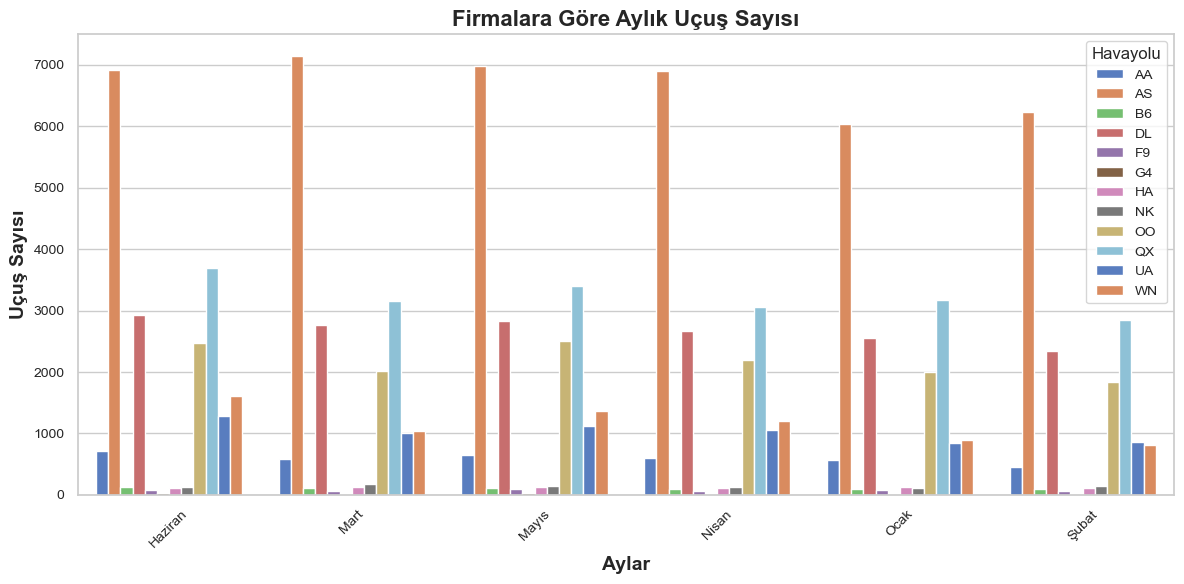

In [74]:
#FİRMALARA GÖRE UÇUŞ GRAFİĞi
# Veri setini kullanarak firmalara göre aylık uçuş sayısını hesaplayın
monthly_flights = data.groupby(['havayolu', 'aylar']).size().reset_index(name='uçuş_sayısı')

# Grafik çizimini yapın
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Arkaplan stili ayarla
ax = sns.barplot(data=monthly_flights, x='aylar', y='uçuş_sayısı', hue='havayolu', palette='muted') # palette=muted
plt.xlabel('Aylar', fontsize=14, weight='bold')
plt.ylabel('Uçuş Sayısı', fontsize=14, weight='bold')
plt.title('Firmalara Göre Aylık Uçuş Sayısı', fontsize=16, weight='bold')
plt.xticks(fontsize=10)  # X eksenindeki etiketlerin font boyutunu ayarla
plt.yticks(fontsize=10)  # Y eksenindeki etiketlerin font boyutunu ayarla
plt.legend(title='Havayolu', title_fontsize='12', fontsize='10', loc='upper right')
plt.xticks(rotation=45)  # X eksenindeki etiketleri 45 derece döndür
plt.tight_layout()
plt.show()

In [75]:
#grafikte firmaların istikrarlı oldukları göze çarpıyor. Uçuş sayısı fazla olan yılın ilk 6 ayında da hep lider.
#aynı şekilde düşük uçuşa sahip olan firmada yılın ilk 6 ayı sürekli düşük.
#ay değişkeni bunu etkilemiyor.

In [ ]:
#Hangi rotaların 1. seviye gecikme sınıfına girme olasılığı en yüksek?
#Cut veya qcut fonksiyonları ile 5 parçaya bölünecek ve sürelerek kategorik bir değişken oluşturunuz

In [334]:
# Gecikme sürelerini belirli aralıklara bölme
data['gecikme_kategorisi'] = pd.cut(data['varış_gecikmesi'], bins=5, labels=['Çok Düşük', 'Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])

# Kategorize edilmiş gecikme sürelerini gösterme
print(data['gecikme_kategorisi'].value_counts())

gecikme_kategorisi
Çok Düşük     107904
Düşük             95
Orta              47
Yüksek             7
Çok Yüksek         5
Name: count, dtype: int64


In [77]:
#cut fonksiyonuna göre genellikle uçuş gecikmelerinin düşük olduğunu, 
#ancak nadirde olsa bazı durumlarda orta, yüksek veya çok yüksek gecikmelerin meydana geldiğini görüyoruz. 

In [335]:
# Gecikme sürelerini eşit gözlem sayısına sahip parçalara bölme
data['gecikme_kategorisi'] = pd.qcut(data['varış_gecikmesi'], q=5, labels=['Çok Düşük', 'Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])

# Kategorize edilmiş gecikme sürelerini gösterme
print(data['gecikme_kategorisi'].value_counts())

gecikme_kategorisi
Çok Düşük     22150
Düşük         21713
Orta          21587
Çok Yüksek    21486
Yüksek        21122
Name: count, dtype: int64


In [81]:
#qcut a göre ise uçuş gecikmeleri eşit frekansta  kategoriye ayrılmış gibi duruyor.
#uçuş gecikmelerinin beş eşit kategoride değerlendirildiğini ve her kategoride benzer miktarda gözlem olduğunu göstermektedir.

In [ ]:
#Hangi rotaların 1. seviye gecikme sınıfına girme olasılığı en yüksek?(En az gecikme 1. Seviye, en çok gecikme 5. seviye olmak üzere)

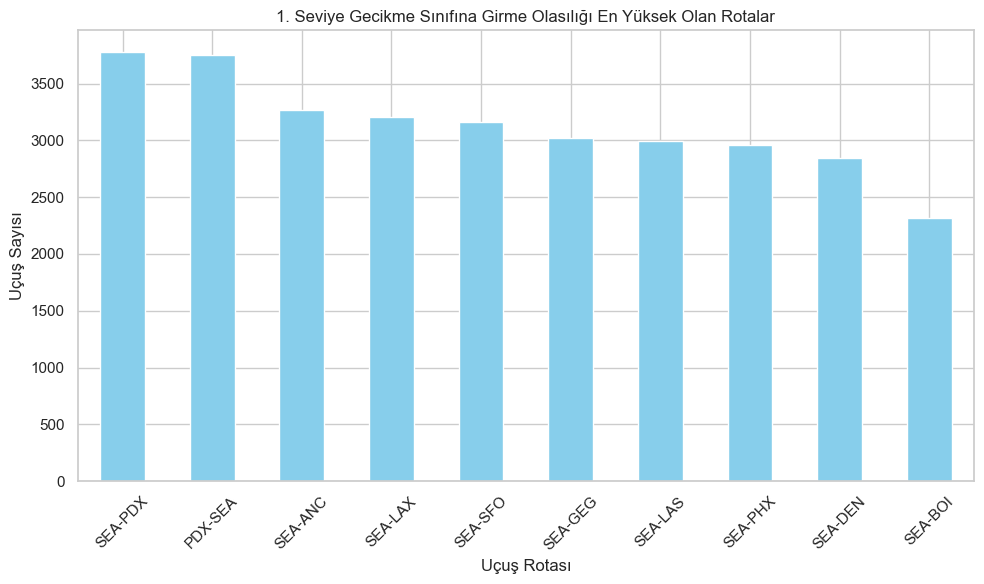

In [386]:
# Veri setindeki gecikme sürelerini 5 parçaya bölecek şekilde kategorik bir değişken oluşturun
data['gecikme_seviyesi'] = pd.cut(data['varış_gecikmesi'], bins=5, labels=['1. Seviye', '2. Seviye', '3. Seviye', '4. Seviye', '5. Seviye'])

# En düşük gecikme sınıfına girme olasılığı en yüksek olan rotaları belirleyin
en_yuksek_olasilik_rotalar = data[data['gecikme_seviyesi'] == '1. Seviye']['uçuş_rotası'].value_counts().head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
en_yuksek_olasilik_rotalar.plot(kind='bar', color='skyblue')
plt.xlabel('Uçuş Rotası')
plt.ylabel('Uçuş Sayısı')
plt.title('1. Seviye Gecikme Sınıfına Girme Olasılığı En Yüksek Olan Rotalar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
uçuş sayısı ile gecikme arasında bir ters orantı mevcut. ucuş sayısı arttıkça gecikme azalmaktadır.

In [84]:
#PROJE SORULARI

In [387]:
#1)Her havayolunun mesafeyle ilişkisini anlamak için kategorik bir değişken oluşturunuz

mesafe_kategori
Kısa        22686
Çok Kısa    21622
Çok Uzun    21433
Uzun        21354
Orta        20963
Name: count, dtype: int64


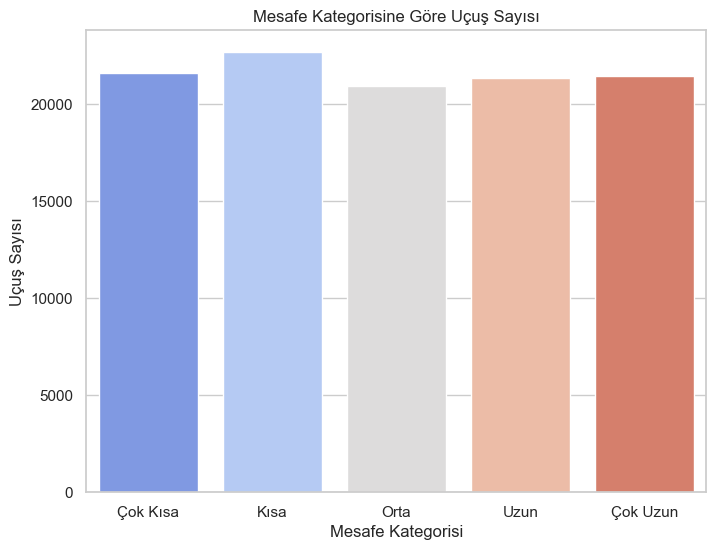

In [337]:
# Mesafeleri aralıklara bölerek kategorik bir değişken oluşturmak için qcut fonksiyonunu kullanabiliriz
data['mesafe_kategori'] = pd.qcut(data['mesafe'], q=5, labels=['Çok Kısa', 'Kısa', 'Orta', 'Uzun', 'Çok Uzun'])

# Oluşturduğumuz yeni değişkeni gözlemleyelim
print(data['mesafe_kategori'].value_counts())

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='mesafe_kategori', palette='coolwarm')
plt.xlabel('Mesafe Kategorisi')
plt.ylabel('Uçuş Sayısı')
plt.title('Mesafe Kategorisine Göre Uçuş Sayısı')
plt.show()

In [ ]:
#burada uçuş sayısı ile mesafe arasında net bir bağlantı yok.
#mesafesi kısa olan da uzun olanda uçuş sayısı aşağı yukarı aynı gözüküyor.

In [338]:
#2)Uçuş mesafeleri, 500 mil altındaki mesafeler, 500-1000 mil arasındaki mesafeler ve 
#1000 mil ve üzerindeki mesafeler olmak üzere üç ana grupta sınıflandırınız.

mesafe_grubu
1000 Mil Üzeri        44119
500-1000 Mil Arası    38166
500 Mil Altı          25773
Name: count, dtype: int64


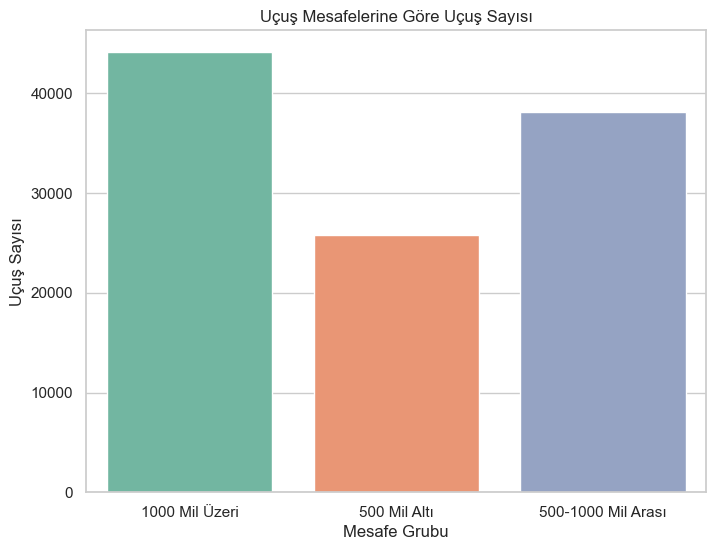

In [388]:
# Uçuş mesafelerini gruplara ayırmak için bir fonksiyon tanımlayalım
def mesafe_grupla(mesafe):
    if mesafe < 500:
        return '500 Mil Altı'
    elif 500 <= mesafe <= 1000:
        return '500-1000 Mil Arası'
    else:
        return '1000 Mil Üzeri'

# Uçuş mesafelerini gruplara göre sınıflandıralım
data['mesafe_grubu'] = data['mesafe'].apply(mesafe_grupla)

# Oluşturduğumuz yeni değişkeni gözlemleyelim
print(data['mesafe_grubu'].value_counts())

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='mesafe_grubu', palette='Set2')
plt.xlabel('Mesafe Grubu')
plt.ylabel('Uçuş Sayısı')
plt.title('Uçuş Mesafelerine Göre Uçuş Sayısı')
plt.show()


In [88]:
#1000 mil ve üzeri uçuşlarda 44000 üzeri uçuş yapılmış
#aynı şekilde 500-1000mil arası uçuşlarda 38000 üzeri uçuş mevcut
#500 mil ve altı mesafelerde de ise yaklaşık olarak 25000 uçuş yapılmıştır.
#mesafe arttıkça uçuş sayısı artmaktadır.

In [339]:
#3)Havayolu şirketleri arasında en fazla uçuşu gerçekleştiren firmaları belirleyiniz.

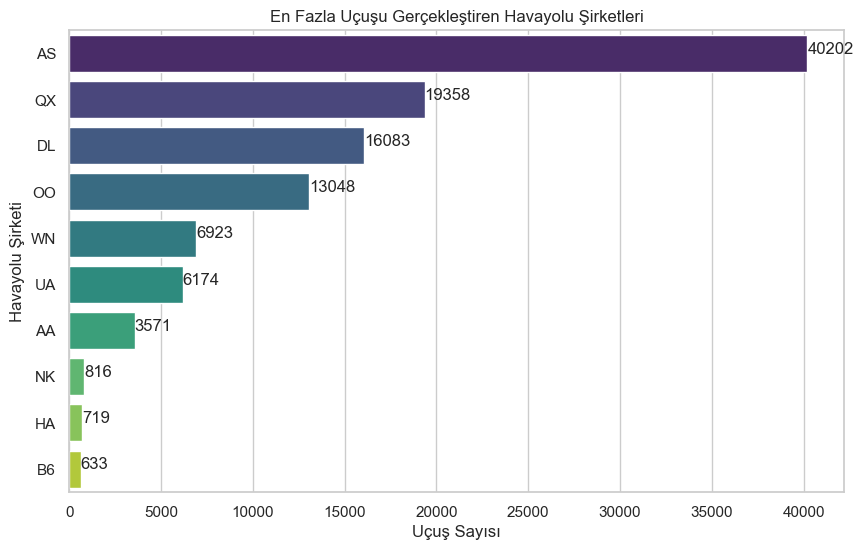

In [389]:
# Havayolu şirketlerinin uçuş sayılarını bulma
ucus_sayilari = data['havayolu'].value_counts().head(10)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=ucus_sayilari.values, y=ucus_sayilari.index, palette="viridis")
plt.xlabel('Uçuş Sayısı')
plt.ylabel('Havayolu Şirketi')
plt.title('En Fazla Uçuşu Gerçekleştiren Havayolu Şirketleri')

# Her çubuğun sonuna uçuş sayısını yazma
for index, value in enumerate(ucus_sayilari.values):
    barplot.text(value, index, str(value))

plt.show()

In [91]:
#ilk 10 firmayı belirledik. 40202 uçuş ile AS firması en çok uçuş gerçekleştiren firma oldu.
#AS firmasının uçuş mesafelerini merak ettim.(allta) onlara bakacak olursak allta en çok 1000mil ve civarı uçtuğunu görüyoruz.
#ama nerdeyse her mesafeye uçuşu mevcut.

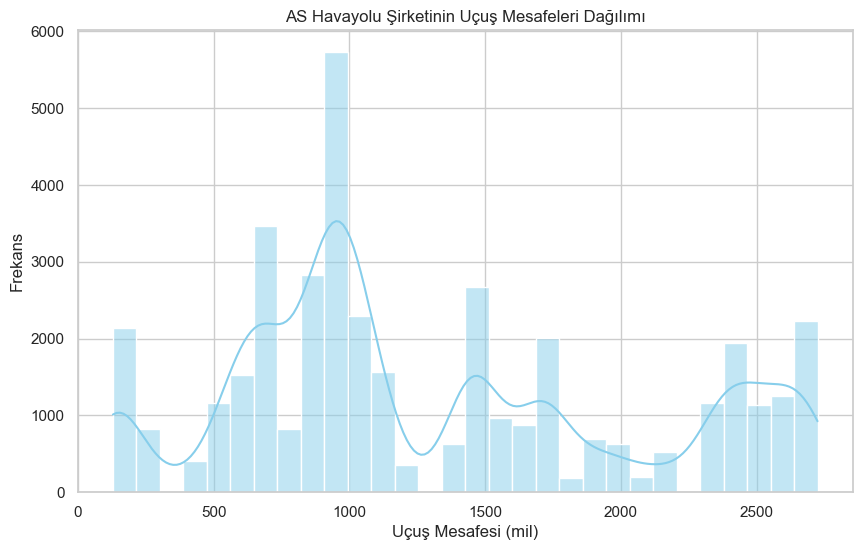

In [340]:
# AS havayolu şirketinin uçuşlarını filtreleyelim
AS_ucuslari = data[data['havayolu'] == 'AS']

# AS havayolu şirketinin uçuşlarının mesafelerini görselleştirelim
plt.figure(figsize=(10, 6))
sns.histplot(AS_ucuslari['mesafe'], bins=30, kde=True, color='skyblue')
plt.xlabel('Uçuş Mesafesi (mil)')
plt.ylabel('Frekans')
plt.title('AS Havayolu Şirketinin Uçuş Mesafeleri Dağılımı')
plt.grid(True)
plt.show()

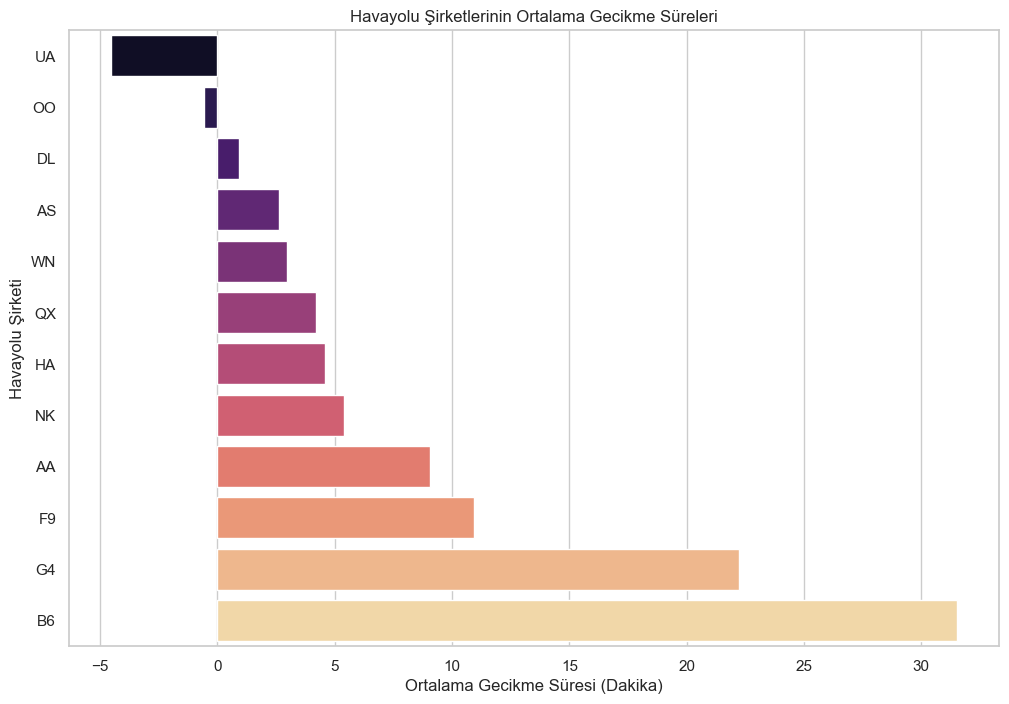

In [390]:
#4)# Havayolu şirketlerinin ortalama gecikme sürelerini hesaplayalım
# Havayolu şirketlerinin ortalama gecikme sürelerini hesaplayalım
ortalama_gedikmeler = data.groupby('havayolu')['varış_gecikmesi'].mean().sort_values()

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x=ortalama_gedikmeler.values, y=ortalama_gedikmeler.index, palette="magma")
plt.xlabel('Ortalama Gecikme Süresi (Dakika)')
plt.ylabel('Havayolu Şirketi')
plt.title('Havayolu Şirketlerinin Ortalama Gecikme Süreleri')
plt.show()

In [94]:
#UA isimli şirket erken kalkarak gecikmelerden ziyade erken kalkış 1. si olmuştur.
#B6 isimli şirket ise 30 dakikayı bulan ortalama gecikme sürelerine sahiptir.
#altta yazdığın sorguda ise gecikmelerin uçuş adeti ile veya uçuş mesafesi ile bağlantısına bakacağım.

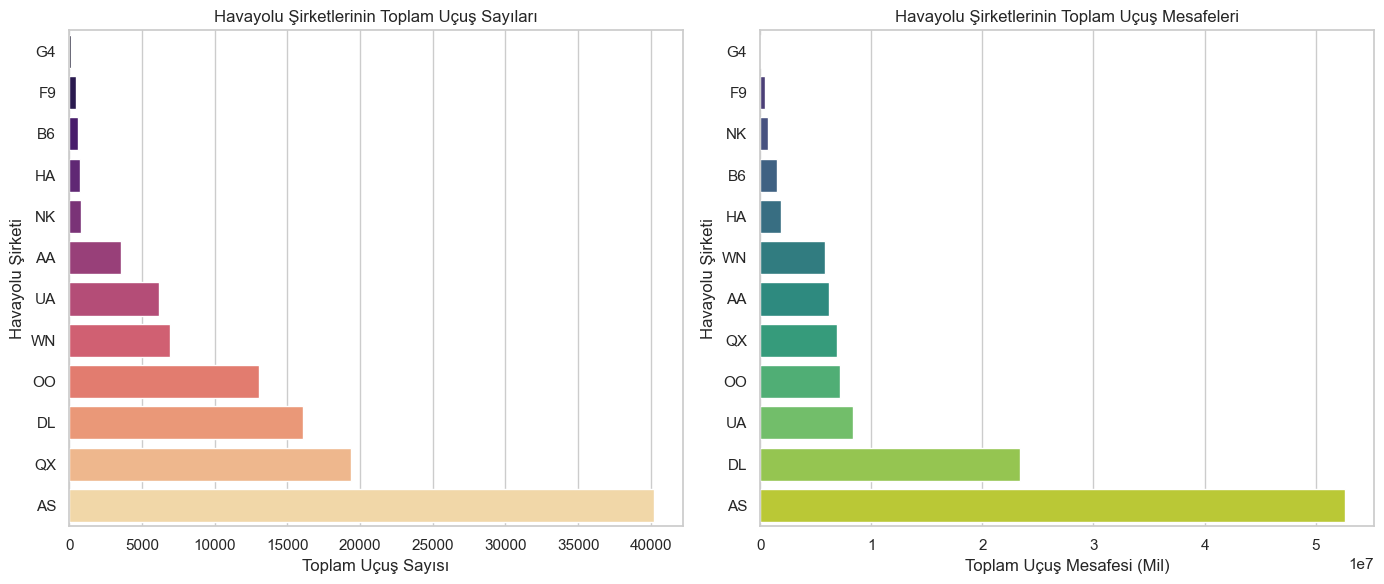

In [391]:
# Havayolu şirketlerinin toplam uçuş sayılarını ve toplam uçuş mesafelerini hesaplayalım
toplam_ucus_sayisi = data.groupby('havayolu')['uçuş_numarası'].count().sort_values()
toplam_ucus_mesafesi = data.groupby('havayolu')['mesafe'].sum().sort_values()

# Görselleştirme
plt.figure(figsize=(14, 6))

# Toplam Uçuş Sayısı
plt.subplot(1, 2, 1)
sns.barplot(x=toplam_ucus_sayisi.values, y=toplam_ucus_sayisi.index, palette="magma")
plt.xlabel('Toplam Uçuş Sayısı')
plt.ylabel('Havayolu Şirketi')
plt.title('Havayolu Şirketlerinin Toplam Uçuş Sayıları')

# Toplam Uçuş Mesafesi
plt.subplot(1, 2, 2)
sns.barplot(x=toplam_ucus_mesafesi.values, y=toplam_ucus_mesafesi.index, palette="viridis")
plt.xlabel('Toplam Uçuş Mesafesi (Mil)')
plt.ylabel('Havayolu Şirketi')
plt.title('Havayolu Şirketlerinin Toplam Uçuş Mesafeleri')

plt.tight_layout()
plt.show()

In [96]:
#burada uçuş sayısı ile yada toplam uçuş mesafesi ile bağlantı gözükmemektedir.
#en çok gecikme yaşayan B6 firması hem az uçuş hemde toplam mesafe uçuş uzunluğunun az olduğu görülmekte.
#en az gecikmeye sahip UA firması ise ortalama bir uçuş sayısı ve mesafesine sahiptir. 
#UA ile yakın oranlarda uçuş yapan firmalar da ise gecikme UA firmasına göre oldukça fazladır.

In [343]:
#5)Havayolu performansının yılın farklı aylarına göre değişip değişmediğini ve 
#en iyi 5 havayolu performansı ile en kötü 5 performansı gösteriniz.

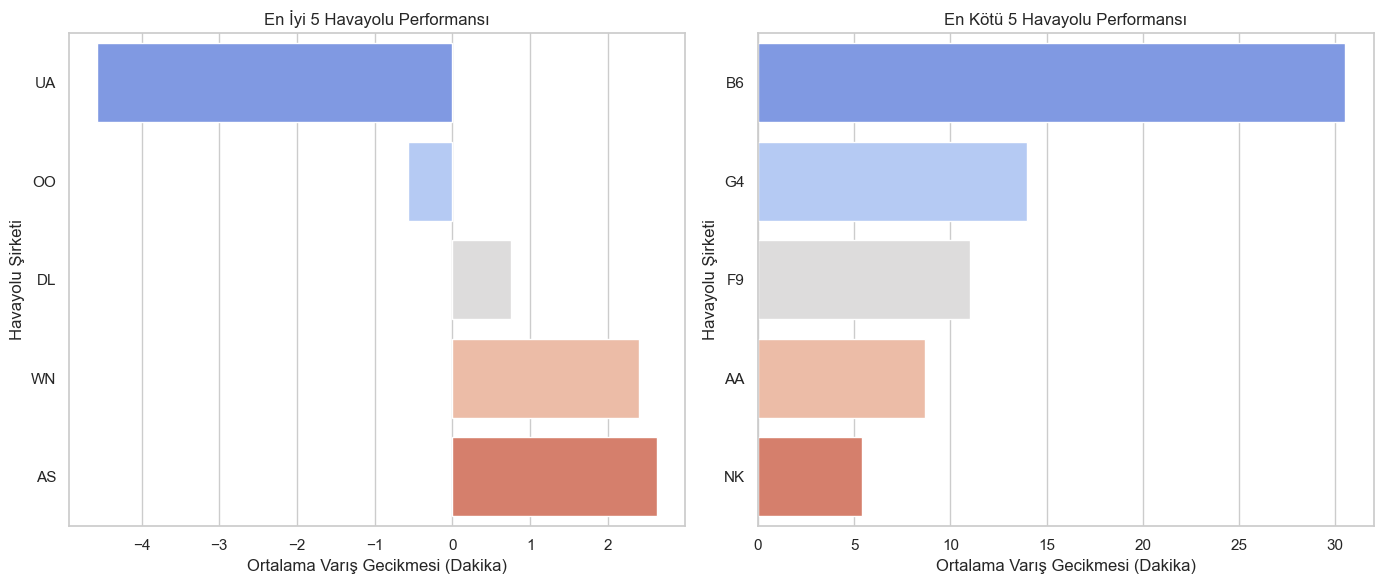

In [393]:
# Ay isimlerini içeren bir sözlük oluşturun
ay_isimleri = {
    1: 'Ocak',
    2: 'Şubat',
    3: 'Mart',
    4: 'Nisan',
    5: 'Mayıs',
    6: 'Haziran'
}

# Veri setindeki ay sütununu ayların isimleriyle değiştirin
data['aylar'] = data['ay'].map(ay_isimleri)

# Ay ve havayolu şirketi bazında ortalama varış gecikmesini hesaplayın
ortalama_gedikme_performansi = data.groupby(['aylar', 'havayolu'])['varış_gecikmesi'].mean().reset_index()

# En iyi 5 performans
en_iyi_performans = ortalama_gedikme_performansi.groupby('havayolu')['varış_gecikmesi'].mean().sort_values().head(5)

# En kötü 5 performans
en_kotu_performans = ortalama_gedikme_performansi.groupby('havayolu')['varış_gecikmesi'].mean().sort_values(ascending=False).head(5)

# Görselleştirme
plt.figure(figsize=(14, 6))

# En İyi Performans
plt.subplot(1, 2, 1)
sns.barplot(x=en_iyi_performans.values, y=en_iyi_performans.index, palette="coolwarm")
plt.xlabel('Ortalama Varış Gecikmesi (Dakika)')
plt.ylabel('Havayolu Şirketi')
plt.title('En İyi 5 Havayolu Performansı')

# En Kötü Performans
plt.subplot(1, 2, 2)
sns.barplot(x=en_kotu_performans.values, y=en_kotu_performans.index, palette="coolwarm")
plt.xlabel('Ortalama Varış Gecikmesi (Dakika)')
plt.ylabel('Havayolu Şirketi')
plt.title('En Kötü 5 Havayolu Performansı')

plt.tight_layout()
plt.show()


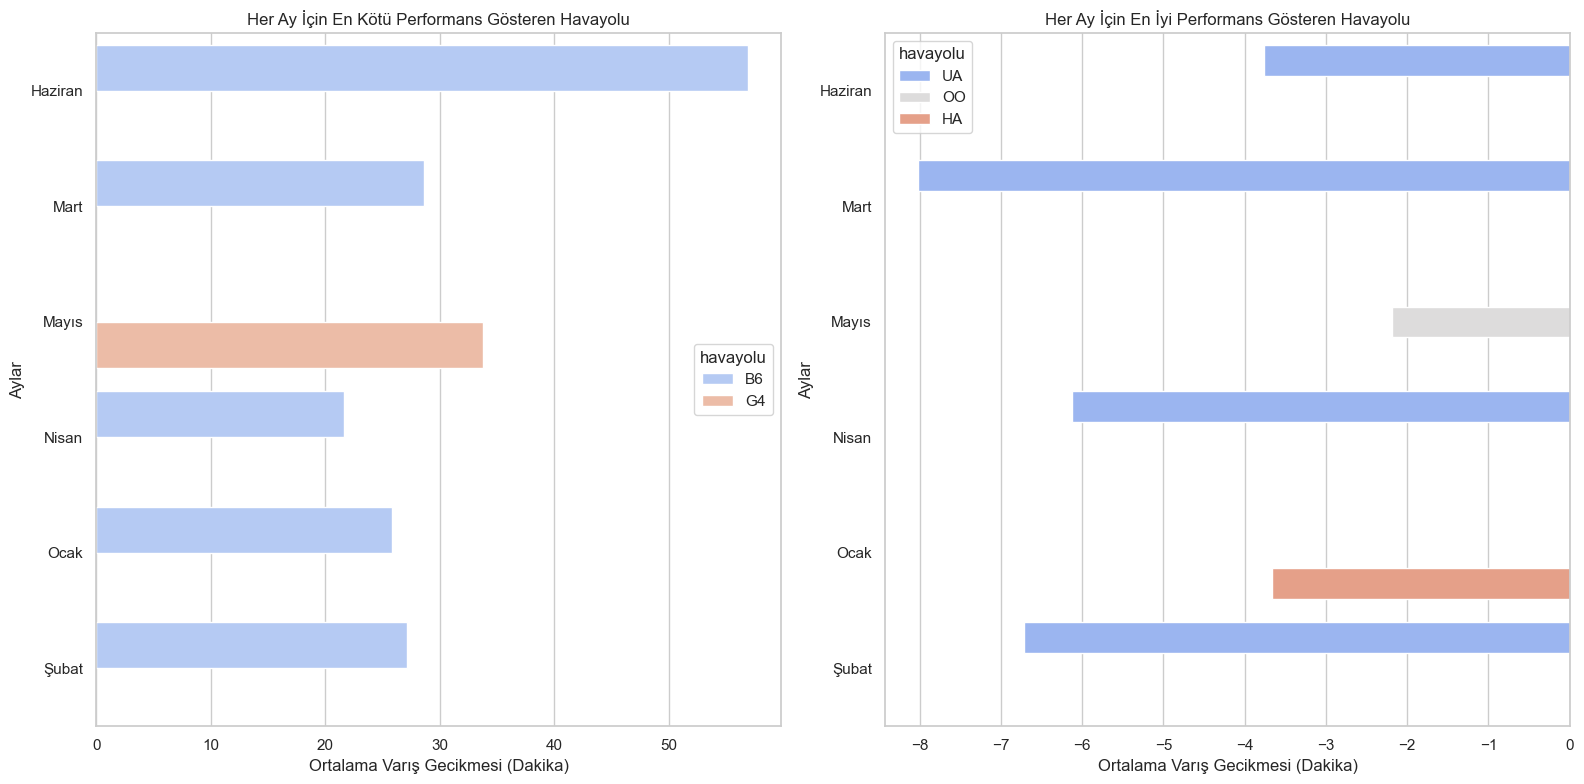

In [99]:
# Ay isimlerini içeren bir sözlük oluşturun
ay_isimleri = {
    1: 'Ocak',
    2: 'Şubat',
    3: 'Mart',
    4: 'Nisan',
    5: 'Mayıs',
    6: 'Haziran'
}

# Veri setindeki ay sütununu ayların isimleriyle değiştirin
data['aylar'] = data['ay'].map(ay_isimleri)

# Ay ve havayolu şirketi bazında ortalama varış gecikmesini hesaplayın
ortalama_gedikme_performansi = data.groupby(['aylar', 'havayolu'])['varış_gecikmesi'].mean().reset_index()

# Her ay için en kötü performansı gösteren havayolu
en_kotu_performans_aylar = ortalama_gedikme_performansi.loc[ortalama_gedikme_performansi.groupby('aylar')['varış_gecikmesi'].idxmax()]

# Her ay için en iyi performansı gösteren havayolu
en_iyi_performans_aylar = ortalama_gedikme_performansi.loc[ortalama_gedikme_performansi.groupby('aylar')['varış_gecikmesi'].idxmin()]

# Görselleştirme
plt.figure(figsize=(16, 8))

# En Kötü Performans Aylara Göre
plt.subplot(1, 2, 1)
sns.barplot(x='varış_gecikmesi', y='aylar', hue='havayolu', data=en_kotu_performans_aylar, palette='coolwarm')
plt.xlabel('Ortalama Varış Gecikmesi (Dakika)')
plt.ylabel('Aylar')
plt.title('Her Ay İçin En Kötü Performans Gösteren Havayolu')

# En İyi Performans Aylara Göre
plt.subplot(1, 2, 2)
sns.barplot(x='varış_gecikmesi', y='aylar', hue='havayolu', data=en_iyi_performans_aylar, palette='coolwarm')
plt.xlabel('Ortalama Varış Gecikmesi (Dakika)')
plt.ylabel('Aylar')
plt.title('Her Ay İçin En İyi Performans Gösteren Havayolu')

plt.tight_layout()
plt.show()

In [ ]:
#6)Uçuş iptallerinin yüzde kaç olduğunu belirleyip havayoluna göre değişkenliğini gösteriniz?

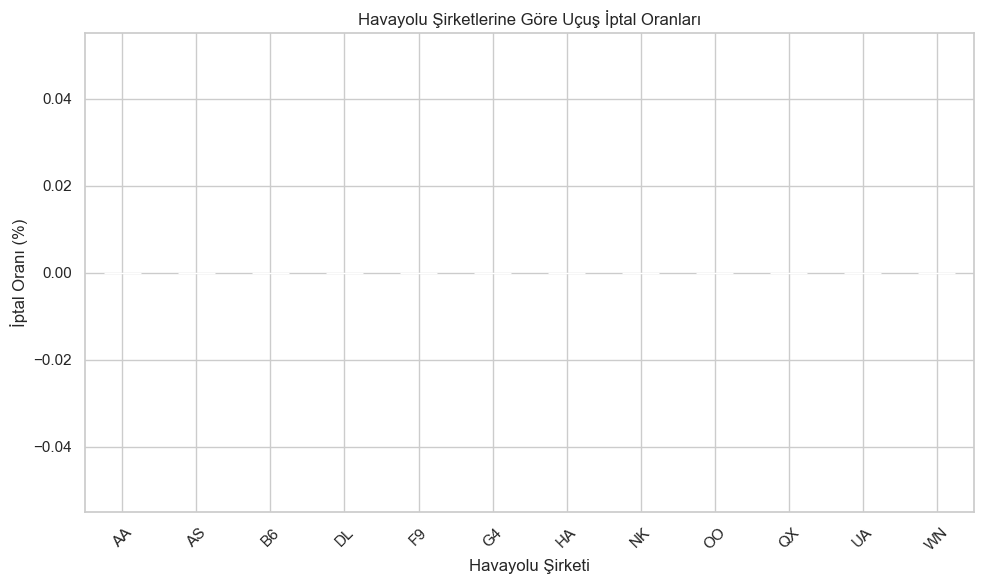

In [394]:
# Havayolu şirketlerine göre uçuş iptallerinin yüzdesini hesaplayalım
iptal_oranlari = data[data['uçuş_durumu'] == 'iptal'].groupby('havayolu')['havayolu'].count() / data.groupby('havayolu')['havayolu'].count() * 100

# Görselleştirme
plt.figure(figsize=(10, 6))
iptal_oranlari.plot(kind='bar', color='salmon')
plt.xlabel('Havayolu Şirketi')
plt.ylabel('İptal Oranı (%)')
plt.title('Havayolu Şirketlerine Göre Uçuş İptal Oranları')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#buradan veriyi temizlerken iptal olan statüdeki bilgileri de sildiğimi farkettim. 
#yukarı çıkıp saatlerce aramama rağmen maalesef nerede iptal verilerinin silindiğini bulamadım. o yüzden burasını atlıyorum.

In [ ]:
#7)Rotar Süresinin daha yüksek olduğu günün belirli bir saati ve/veya yılın saati var mı?

In [ ]:
Gecikmelerin günün belirli bir saati ve/veya yılın saatiyle ilişkili olup olmadığını anlamak için bir analiz yapabiliriz. 
Bu analiz için önce gecikmelerin saat ve yıl bazında nasıl dağıldığını inceleyebiliriz. 
Ardından, belirli saatlerde veya belirli yıllarda daha yüksek gecikmelerin olup olmadığını belirlemek için 
bir grafik oluşturabiliriz.

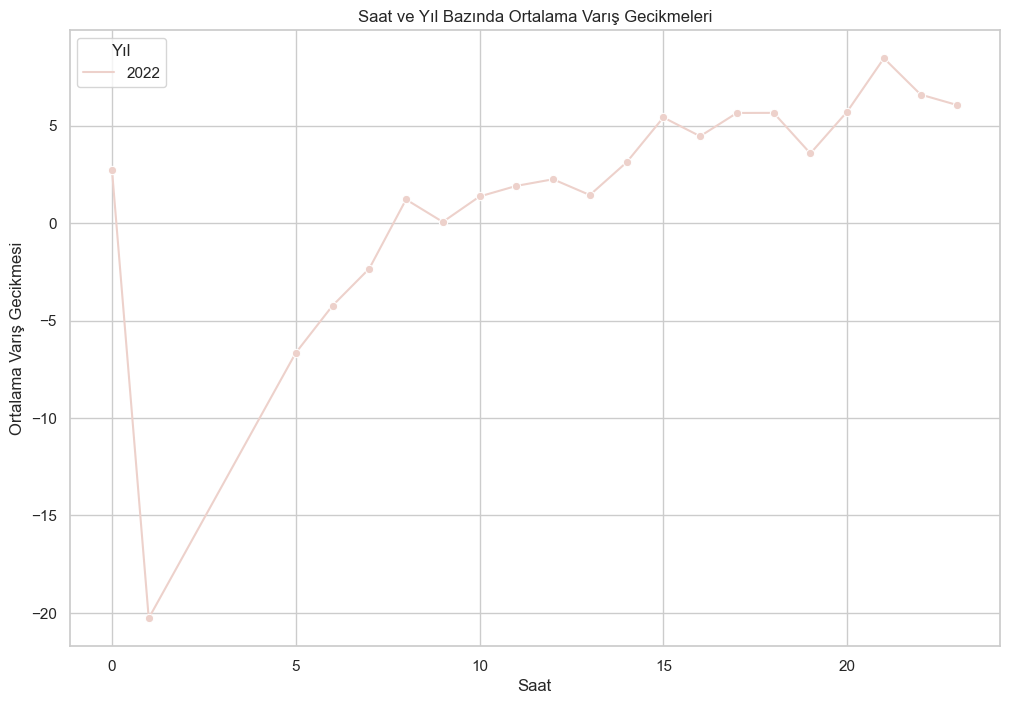

In [349]:
# Saat ve yıl bazında gecikmeleri gruplayarak ortalama gecikmeleri hesaplayın
gecikmeler = data.groupby(['saat', 'yıl'])['varış_gecikmesi'].mean().reset_index()

# Grafik oluşturma
plt.figure(figsize=(12, 8))
sns.lineplot(data=gecikmeler, x='saat', y='varış_gecikmesi', hue='yıl', marker='o')
plt.title('Saat ve Yıl Bazında Ortalama Varış Gecikmeleri')
plt.xlabel('Saat')
plt.ylabel('Ortalama Varış Gecikmesi')
plt.grid(True)
plt.legend(title='Yıl', loc='upper left')
plt.show()

In [ ]:
Bazı saatlerde (örneğin, saat 1), negatif ortalama gecikmeler olduğunu, yani uçakların belirli saatlerde planlanandan önce 
varış yaptığını görebiliriz. Diğer saatlerde ise pozitif ortalama gecikmeler olduğunu, yani uçakların planlanandan daha sonra 
varış yaptığını görebiliriz.

In [ ]:
hangi saatlerde ve hangi yıllarda daha yüksek veya daha düşük gecikmeler olduğunu analiz edebilir ve 
bu bilgilere dayanarak operasyonel kararlar alabilirsiniz. 
Örneğin, yüksek gecikmelerin yaşandığı saatlerde ek önlemler alınabilir veya operasyonel süreçler gözden geçirilebilir.

In [ ]:
#8)En yüksek ROTAR süresine sahip güzergahlar hangileri?

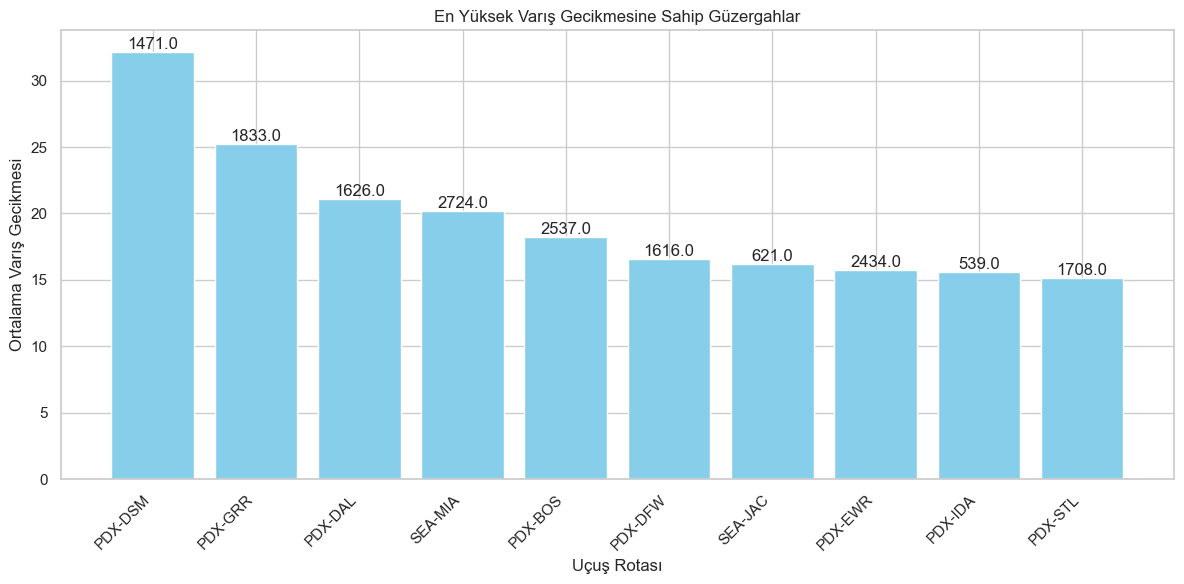

In [353]:
# Veri setindeki güzergahları varış gecikmesine göre gruplayalım ve ortalamalarını alalım
ortalama_guzergah_gecikmeleri = data.groupby('uçuş_rotası')['varış_gecikmesi'].mean()
mesafeler = data.groupby('uçuş_rotası')['mesafe'].mean()

# En yüksek gecikmeye sahip 10 güzergahı alalım
en_yuksek_gecikme_guzergahlari = ortalama_guzergah_gecikmeleri.sort_values(ascending=False).head(10)

# Grafiği oluşturalım
plt.figure(figsize=(12, 6))
bars = plt.bar(en_yuksek_gecikme_guzergahlari.index, en_yuksek_gecikme_guzergahlari.values, color='skyblue')

# Çubukların üzerine mesafelerini ekleyelim
for bar, mesafe in zip(bars, mesafeler[en_yuksek_gecikme_guzergahlari.index]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(mesafe, 2), va='bottom', ha='center')

plt.xlabel('Uçuş Rotası')
plt.ylabel('Ortalama Varış Gecikmesi')
plt.title('En Yüksek Varış Gecikmesine Sahip Güzergahlar')
plt.xticks(rotation=45, ha='right')  # x eksenindeki etiketleri 45 derece sağa döndür
plt.tight_layout()  # grafik öğeleri arasındaki boşlukları düzenle
plt.show()

In [354]:
#grafikteki barlara mesafeyi de ekledim. mesafe ile bir bağlantı var mı onu da incelemek istiyorum.
#mesafe ile bir bağlantı göremedim.

In [ ]:
#9)Makine öğrenmesi modeli kurup uçuşların gecikme sürelerini tahmin ediniz.

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gereksiz sütunları kaldırın
data = data.drop(['uçuş_numarası', 'kuyruk_numarası'], axis=1)

# Kategorik değişkenleri kodlayın
data = pd.get_dummies(data, columns=['havayolu', 'havayolu_şirketi'])

# Özellikler ve hedef değişken arasında ayrım yapın
X = data[['kalkış_zamanı', 'mesafe', 'hava_süresi', 'sıcaklık', 'çiğ_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_şiddeti', 'basınç', 'görüş_mesafesi']]
y = data['varış_gecikmesi']

# Veriyi eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Modeli değerlendirin
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Ortalama Kare Hata:', mse)
#bu ortalama kare hata skoru fazla bir rakam çıktı. modelin tahminleri gerçek değerden uzak olacağı sonucu çıkıyor.

Ortalama Kare Hata: 1645.0479791222594


In [ ]:
#İlk olarak, gereksiz sütunlar uçuş_numarası ve kuyruk_numarası veri setinden kaldırılır.
#Hedef değişken (bağımlı değişken), modelin tahmin etmeye çalıştığı değerdir. Bu değer, varış_gecikmesi olarak belirlenmiştir.
#train_test_split fonksiyonu, veri setini eğitim ve test setlerine ayırır. 
#Bu sayede model eğitilirken ayrılan veri seti üzerinde test edilebilir.
#LinearRegression sınıfından bir model oluşturulur ve eğitilir (fit yöntemi kullanılarak). 
#Model, eğitim verileri üzerinde özellikler ve hedef değişken arasındaki ilişkiyi öğrenir.
#Eğitilmiş model, test veri seti üzerinde tahminler yapar (predict yöntemi kullanılarak).
#Düşük MSE değerleri, modelin daha iyi tahminler yaptığını gösterir.

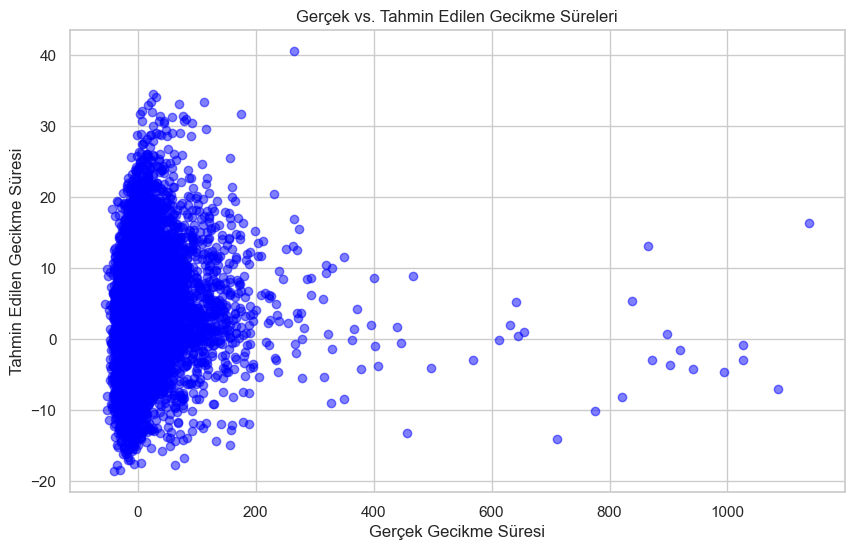

In [396]:
# Gerçek ve tahmin edilen gecikme sürelerini alın
gercek = y_test  # Test setindeki gerçek gecikme süreleri
tahmin_edilen = y_pred  # Model tarafından tahmin edilen gecikme süreleri

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(gercek, tahmin_edilen, color='blue', alpha=0.5)  # Gerçek vs. Tahmin Edilen
plt.xlabel('Gerçek Gecikme Süresi')
plt.ylabel('Tahmin Edilen Gecikme Süresi')
plt.title('Gerçek vs. Tahmin Edilen Gecikme Süreleri')
plt.grid(True)
plt.show()


In [359]:
# Gerçek ve tahmin edilen gecikme sürelerini alın
gercek = y_test  # Test setindeki gerçek gecikme süreleri
tahmin_edilen = y_pred  # Model tarafından tahmin edilen gecikme süreleri

In [362]:
# Gerçek ve tahmin edilen gecikme sürelerini içeren bir veri çerçevesi oluşturma
df = pd.DataFrame({'Gerçek Gecikme Süresi': gercek, 'Tahmin Edilen Gecikme Süresi': tahmin_edilen})

# İlk beş satırı gösterme
print(df.head(10))


        Gerçek Gecikme Süresi  Tahmin Edilen Gecikme Süresi
29011                     -16                      6.499261
110313                    -14                     -4.892648
83684                      10                     -0.476738
44338                      24                      7.328451
27883                     -16                     -2.897681
45363                       3                      1.259618
58751                      55                     10.088609
62303                       1                      0.513502
80674                     -12                      5.154731
7833                       -7                     -3.901414


In [ ]:
#Gerçek ve tahmin edilen gecikme süreleri arasındaki farklar incelendiğinde, modelin bazı durumlarda gerçek değerlere oldukça 
#yakın tahminler yapabildiği görülüyor. Ancak bazı durumlarda tahminlerin gerçek değerlerden oldukça farklı olduğu gözlemleniyor.

In [ ]:
#10)modeli değerlendiriniz

In [ ]:
Tablodaki bazı önemli sütunlar şunlardır:

Kalkış Noktası ve Varış Noktası: Uçuşun başlangıç ve bitiş noktaları.
Planlanan Kalkış Zamanı ve Planlanan Varış Zamanı: Uçuşun planlanan başlangıç ve bitiş zamanları.
Kalkış Gecikmesi ve Varış Gecikmesi: Gerçekleşen kalkış ve varış zamanları ile planlanan zamanlar arasındaki fark.
Hava Süresi: Uçuşun hava süresi.
Mesafe: Kalkış noktası ile varış noktası arasındaki mesafe.
Hava Durumu: Uçuş sırasında sıcaklık, çiğ noktası, nem, rüzgar hızı ve diğer hava koşulları.
    
Bu veriler, havayolu operasyonlarının performansını değerlendirmek, gecikmelerin nedenlerini anlamak ve gelecekteki 
uçuşları planlamak için kullanılabilir. Örneğin, hava koşullarının uçuş gecikmeleri üzerinde nasıl bir etkiye sahip 
olduğunu analiz etmek mümkündür. Ayrıca, hangi rotalarda ve hangi hava koşullarında daha fazla gecikme olduğunu 
belirlemek için verileri kullanabiliriz.